In [7]:
import apebench
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
CONFIGS = [
    {
        "scenario": "diff_adv",
        "task": "predict",
        "net": net,
        "train": "one",
        "start_seed": 0,
        "num_seeds": 20,
        "advection_gamma": advection_gamma,
    }
    for net in [
        *[f"Conv;34;{depth};relu" for depth in [0, 1, 2, 10]],
        "UNet;12;2;relu",  # 27'193 params, 29 receptive field per direction
        "Res;26;8;relu",  # 32'943 params, 16 receptive field per direction
        "FNO;12;18;4;gelu",  # 32'527 params, inf receptive field per direction
        "Dil;2;32;2;relu",  # 31'777 params, 20 receptive field per direction
    ]
    for advection_gamma in [
        0.5,
        2.5,
        10.5,
    ]
]

Running the cell below should take ~40min on a modern GPU. Results will be saved
to disk in the folder `"difficulty_and_receptive_field_advection/"`.

If you want to avoid this, you can download the results from the following
Hugging Face dataset:

https://huggingface.co/datasets/ceyron/difficulty_and_receptive_field_advection

(~350MB)

The data still has to be concatenated and melted

In [ ]:
# Uncomment below to load the results from huggingface instead of running the experiment yourself
# !git clone https://huggingface.co/datasets/ceyron/difficulty_and_receptive_field_advection

In [ ]:
(
    df_metric,
    df_loss,
    _,
    network_list,
) = apebench.run_study_convenience(
    CONFIGS,
    "difficulty_and_receptive_field_advection",
    do_loss=True,
)

In [26]:
def split_net(df):
    df["net_type"] = df["net"].apply(lambda x: x.split(";")[0])
    df["hidden_channels"] = df["net"].apply(
        lambda x: int(x.split(";")[1])
        if len(x.split(";")) == 4
        else int(x.split(";")[2])
    )
    df["conv_depth"] = df["net"].apply(
        lambda x: int(x.split(";")[2]) if x.split(";")[0].lower() == "conv" else 10
    )

    return df

In [27]:
df_loss = split_net(apebench.read_in_kwargs(df_loss))
df_metric = split_net(apebench.read_in_kwargs(df_metric))

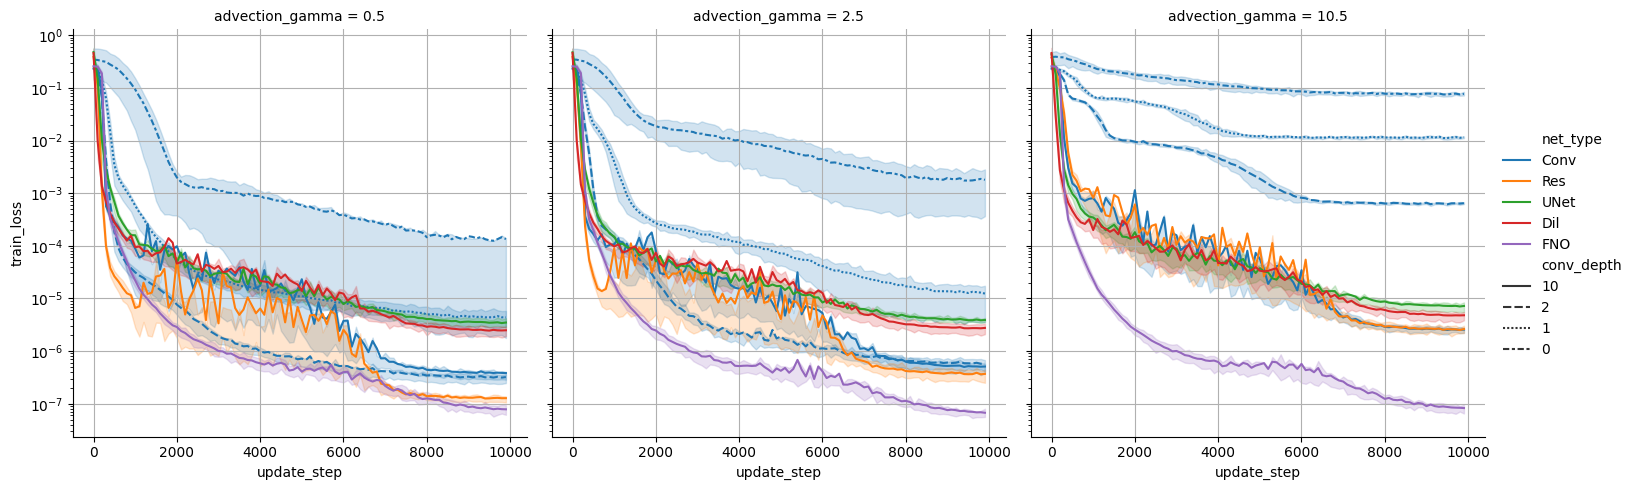

In [28]:
facet = sns.relplot(
    df_loss,
    x="update_step",
    y="train_loss",
    hue="net_type",
    hue_order=["Conv", "Res", "UNet", "Dil", "FNO"],
    style="conv_depth",
    style_order=[10, 2, 1, 0],
    col="advection_gamma",
    kind="line",
    errorbar=("pi", 50),
)
for ax in facet.axes.flat:
    ax.set_yscale("log")
    ax.grid(True)

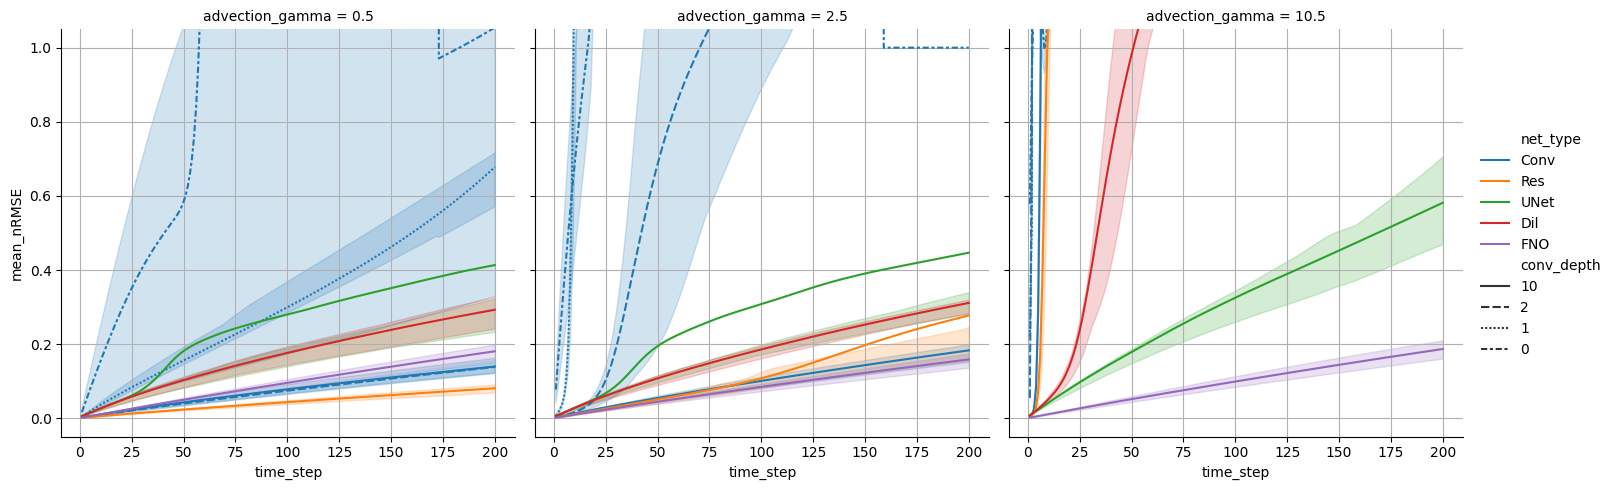

In [29]:
facet = sns.relplot(
    df_metric,
    x="time_step",
    y="mean_nRMSE",
    hue="net_type",
    hue_order=["Conv", "Res", "UNet", "Dil", "FNO"],
    style="conv_depth",
    style_order=[10, 2, 1, 0],
    col="advection_gamma",
    kind="line",
    errorbar=("pi", 50),
)
for ax in facet.axes.flat:
    ax.grid(True)
    ax.set_ylim(-0.05, 1.05)

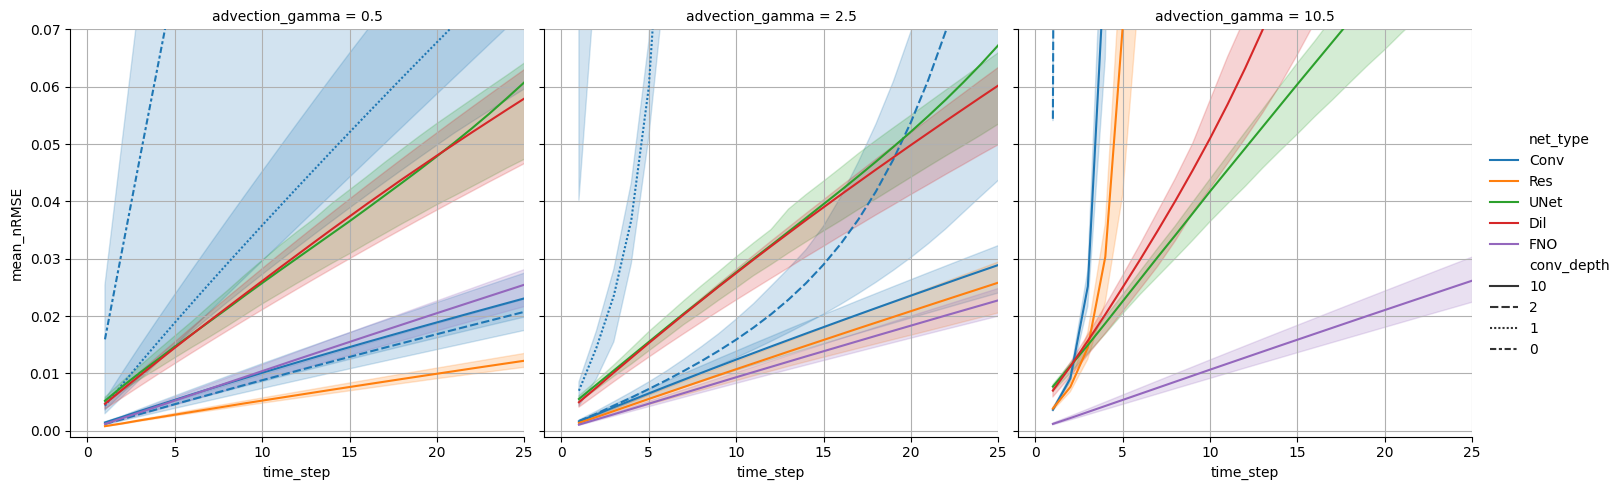

In [30]:
facet = sns.relplot(
    df_metric,
    x="time_step",
    y="mean_nRMSE",
    hue="net_type",
    hue_order=["Conv", "Res", "UNet", "Dil", "FNO"],
    style="conv_depth",
    style_order=[10, 2, 1, 0],
    col="advection_gamma",
    kind="line",
    errorbar=("pi", 50),
)
for ax in facet.axes.flat:
    ax.grid(True)
    ax.set_ylim(-0.001, 0.07)
    ax.set_xlim(-1, 25)